## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 21)

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler


## Loading Data

In [3]:
df = pd.read_csv("global-data-on-sustainable-energy.csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [7]:
df1.shape

(3649, 21)

In [10]:
df1.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
df1.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [12]:
df1.describe(include = "object")

,Entity,Density\n(P/Km2)
count,3649,3648
unique,176,124
top,Afghanistan,25
freq,21,147


In [13]:
unique_values = df1.nunique()
unique_values

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

## Handling Null Values and Duplicate Rows

In [8]:
df1.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [9]:
# Calculating the count of missing values in each column
missing_values = df.isna().sum()

# Creating a bar plot using Plotly Express
fig = px.bar(x=missing_values.index, y=missing_values.values, labels={'x': 'Columns', 'y': 'Missing Values Count'},
             title='Count of Missing Values in Each Column')
fig.show()

In [10]:
# Drop columns with a high number of missing values
df1.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

# Calculate mean for specific columns
Mean_Access = df1['Access to clean fuels for cooking'].mean()
Mean_Renewable = df1['Renewable energy share in the total final energy consumption (%)'].mean()
Mean_Electricity = df1['Electricity from nuclear (TWh)'].mean()
Mean_Energy = df1['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
Mean_Value_co2 = df1['Value_co2_emissions_kt_by_country'].mean()
Mean_gdp_growth = df1['gdp_growth'].mean()
Mean_gdp_per_capita = df1['gdp_per_capita'].mean()

# Fill missing values in specific columns with calculated means
df1['Access to clean fuels for cooking'].fillna(Mean_Access, inplace=True)
df1['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable, inplace=True)
df1['Electricity from nuclear (TWh)'].fillna(Mean_Electricity, inplace=True)
df1['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy, inplace=True)
df1['Value_co2_emissions_kt_by_country'].fillna(Mean_Value_co2, inplace=True)
df1['gdp_growth'].fillna(Mean_gdp_growth, inplace=True)
df1['gdp_per_capita'].fillna(Mean_gdp_per_capita, inplace=True)

# Drop rows with any remaining missing values
df1 = df1.dropna()

# Display the shape of the DataFrame after cleaning
df1.shape

(3597, 18)

In [11]:
df1.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

In [12]:
# Finding duplicate rows
duplicate_rows = df1[df1.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


## Feature engineering

In [13]:
# Reanme columns 
df1.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)

In [14]:
df1.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
df1['Density'] = df1['Density'].str.replace(',', '').astype(int)

In [15]:
# Selecting specific columns 'Entity' and 'Land' into a new DataFrame
energy_land = df1[['Entity', 'Land']]

# Dropping rows with missing values in the selected columns
energy_land = energy_land.dropna()

# Getting unique country names from the 'Entity' column
countries = energy_land['Entity'].unique()

# Getting unique land area values from the 'Land' column
land = energy_land['Land'].unique()

# Clean the land area values by converting to integers
land_int = []
for num in land:
    if isinstance(num, float):
        land_int.append(int(num))
    else:
        land_int.append(int(str(num).replace(',', '')))

In [16]:
df1 = df1.drop(columns = ['Latitude', 'Longitude']) \
    .copy()

In [17]:
# Columns to be scaled
columns_to_scale = ['Electricity from fossil fuels (TWh)','CO2',
                    'Land','Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Density']

# Select only the columns to be scaled
data_to_scale = df1[columns_to_scale]

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler(copy=True)

# Scale the selected columns
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled values
df1_scaled = df1.copy()
df1_scaled[columns_to_scale] = scaled_data

# Display the scaled DataFrame
df1_scaled.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,gdp_growth,gdp_per_capita,Density,Land
0,Afghanistan,2000,1.613591,6.2,44.99,0.000031,0.0,0.000142,65.957440,302.59482,1.64,0.000071,3.441610,13283.774348,0.007179,0.065323
1,Afghanistan,2001,4.074574,7.2,45.60,0.000017,0.0,0.000229,84.745766,236.89185,1.74,0.000068,3.441610,13283.774348,0.007179,0.065323
2,Afghanistan,2002,9.409158,8.2,37.83,0.000025,0.0,0.000256,81.159424,210.86215,1.40,0.000096,3.441610,179.426579,0.007179,0.065323
3,Afghanistan,2003,14.738506,9.5,36.66,0.000060,0.0,0.000288,67.021280,229.96822,1.40,0.000114,8.832278,190.683814,0.007179,0.065323
4,Afghanistan,2004,20.064968,10.9,44.24,0.000064,0.0,0.000256,62.921350,204.23125,1.20,0.000096,1.414118,211.382074,0.007179,0.065323


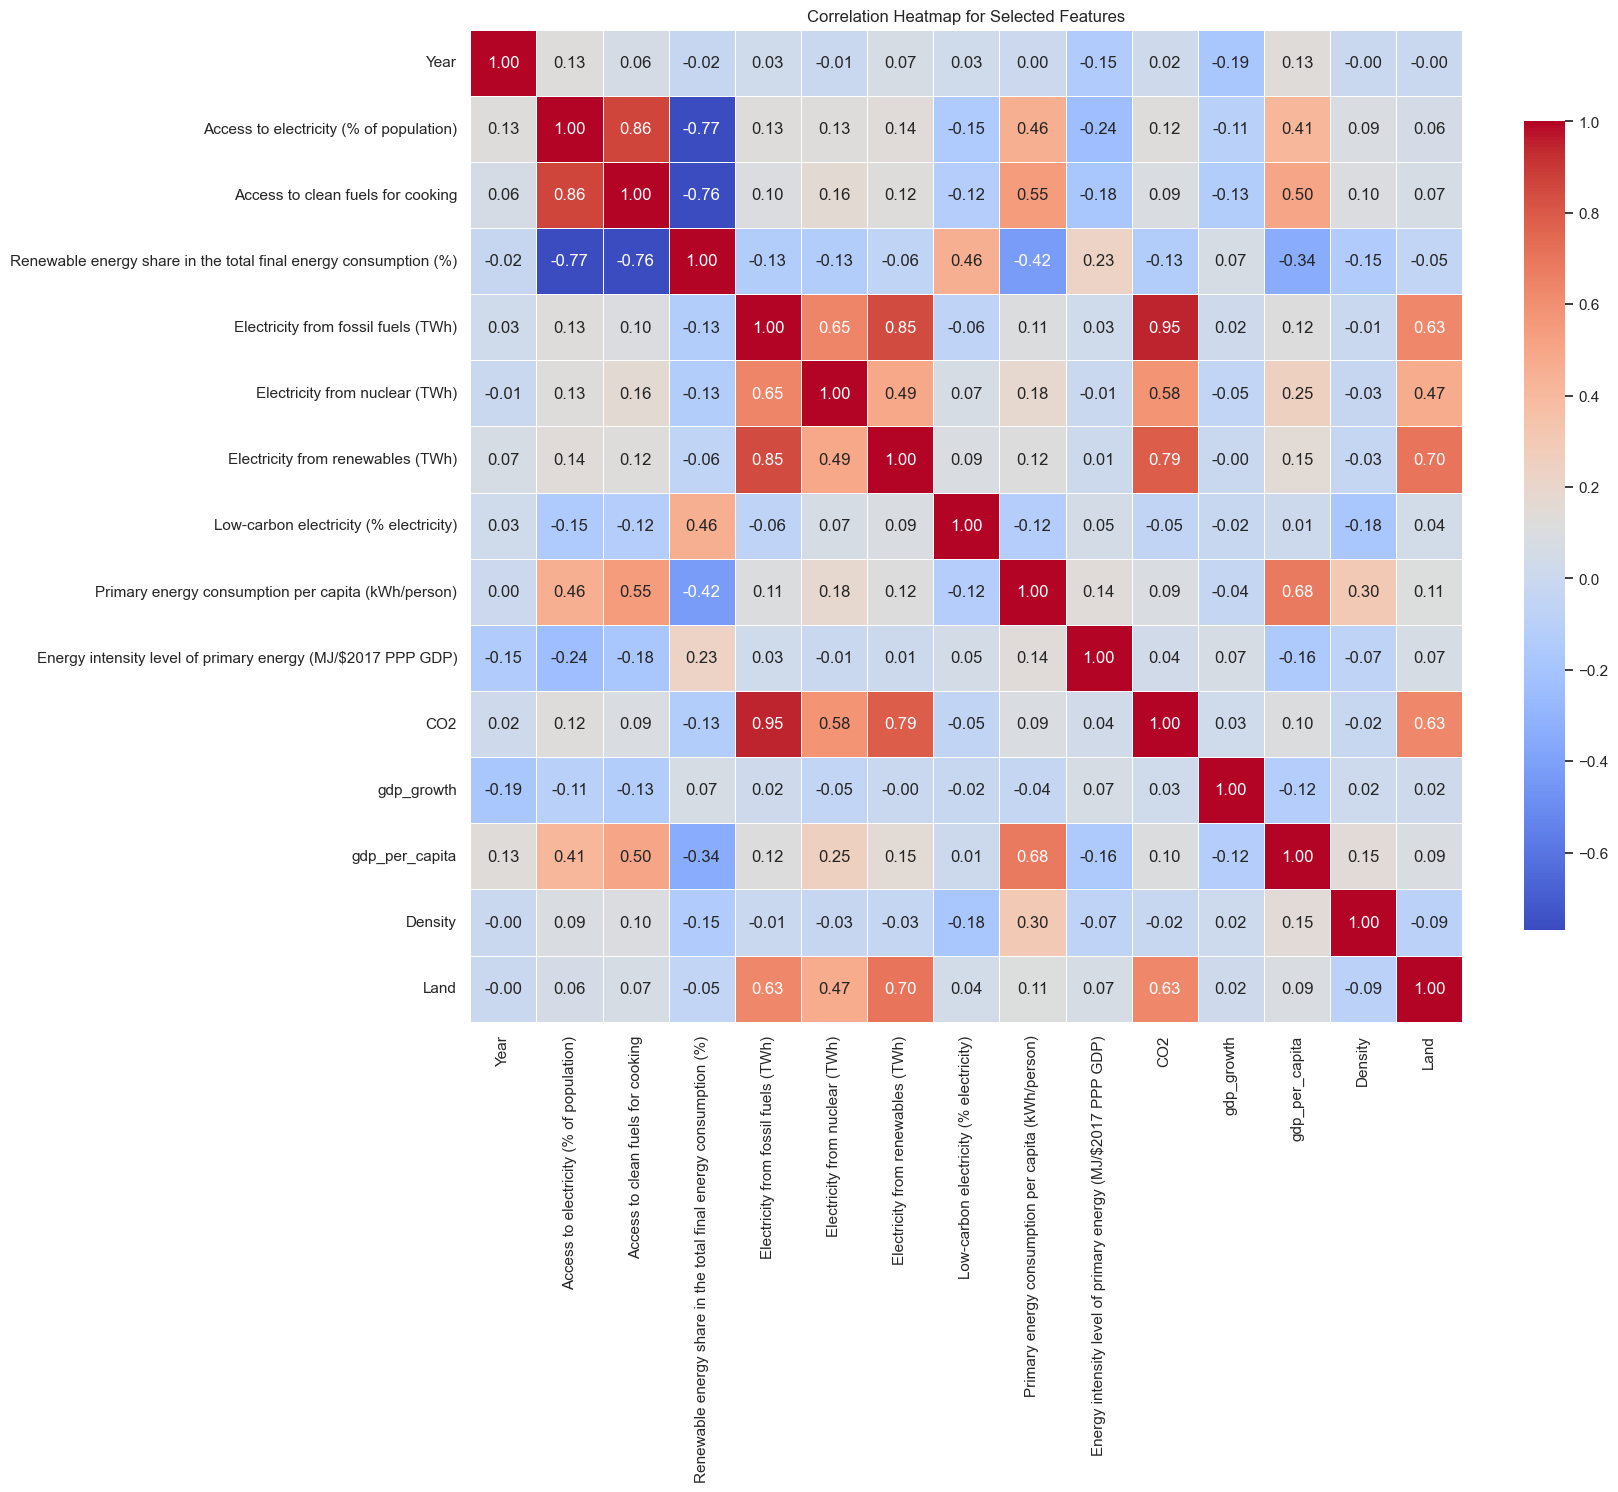

In [18]:
# Assuming 'df' is your DataFrame with the specified features

# Select the relevant features
selected_features = [
    'Year',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'CO2',
    'gdp_growth',
    'gdp_per_capita',
    'Density',
    'Land'
]

# Subset the DataFrame with selected features
subset_df1 = df1[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation values on the heatmap
    cmap='coolwarm',       # Set the color map
    fmt=".2f",             # Format for annotating values
    linewidths=.5,         # Set the width of the lines between cells
    square=True,           # Display a square-shaped heatmap
    cbar_kws={"shrink": 0.75}  # Adjust the size of the color bar
)

# Set the title of the plot
plt.title('Correlation Heatmap for Selected Features')

# Show the plot
plt.show()


In [19]:
# Finding out the highly correlated column to our target column CO2
print('Top 5 Most Positively Correlated to the Target Variable')
correlation_matrix['CO2'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


CO2                                    1.000000
Electricity from fossil fuels (TWh)    0.948946
Electricity from renewables (TWh)      0.786547
Land                                   0.633147
Electricity from nuclear (TWh)         0.582749
Name: CO2, dtype: float64

In [20]:
# finding out the columns that are to be dropped form the dataset to reduce its dimensions
columns_to_drop = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['CO2', col]) < 0.5]
print('number of columns to drop ' ,len(columns_to_drop))
columns_to_drop

number of columns to drop  10


['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density']

In [21]:
# Drop columns except 'Year'

# cols_to_drop = [
    #'Access to electricity (% of population)',
    #'Access to clean fuels for cooking',
    #'Renewable energy share in the total final energy consumption (%)',
    #'Low-carbon electricity (% electricity)',
    #'Primary energy consumption per capita (kWh/person)',
    #'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    #'gdp_growth',
    #'gdp_per_capita'
#]

#df1 = df1.drop(cols_to_drop, axis=1)

## EDA 

In [22]:
# Calculate the maximum 'CO2' emissions for each 'Country' category and sort in descending order
max_co2 = df1.groupby('Entity')['CO2'].max().reset_index()
max_co2 = max_co2.sort_values(by='CO2', ascending=False)

# Select the top 10 'Country' categories with the highest maximum 'CO2' emissions
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='Entity',  # x-values: 'Country' categories
    y='CO2',  # y-values: maximum 'CO2' emissions
    color='CO2',  # Color the bars based on the indices
    title='Top 10 Countries by Maximum CO2 Emissions',  # Set the title of the plot
    labels={'Country': 'Country', 'CO2': 'CO2 Emissions'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [23]:
# Calculate the median 'CO2' emissions for each 'Year'
CO2_By_Year = df1.groupby('Year')['CO2'].max().reset_index()

# Create a line plot using Plotly Express
fig_CO2_By_Year = px.line(
    CO2_By_Year,  # DataFrame containing the data
    x='Year',   # x-values: Year
    y='CO2',  # y-values: median CO2
    labels={'Year': 'Year'},  # Customize label for the x-axis
    title='Maximum CO2 Emissions by Year',  # Set the title of the plot
    height=650  # Set the height of the plot
)

# Display the plot
fig_CO2_By_Year.show()

Year by Year the CO2 emission kept growing and then took a sudden fall after 2019 when pandemic happend. 

In [29]:
# Calculate the Max 'CO2' for each 'Year' and sort in descending order
Max_CO2 = df1.groupby('Year')['CO2'].max().reset_index()
Max_CO2 = Max_CO2.sort_values(by='CO2', ascending=False)

# Select the top 10 years with the highest CO2 emissions
top_10_expensive_CO2 = Max_CO2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_expensive_CO2,  # DataFrame containing the data
    x='Year',  # x-values: years
    y='CO2',  # y-values: Max CO2 emissions
    color='CO2',  # Color the bars based on the CO2 values
    title='Top 10 Years by Max CO2 Emissions',  # Set the title of the plot
    labels={'Year': 'Year', 'CO2': 'Max CO2'},  # Set labels for axes
    template='plotly_white'  # Use a white template for the plot
)

# Set font color to black
fig.update_traces(textfont_color='black')

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [30]:
#Calculate the max 'Entity' for each 'Electricity from fossil fuels (TWh)'
Entity_By_Electricity_from_fossil = df1.groupby('Entity')['Electricity from fossil fuels (TWh)'].max().reset_index()

# Create a line plot using Plotly Express
fig_Entity_By_Electricity_from_fossil = px.line(
    Entity_By_Electricity_from_fossil,  # DataFrame containing the data
    x='Entity',   # x-values: Year
    y='Electricity from fossil fuels (TWh)',  # y-values: median Land
    labels={'Entity': 'Entity'},  # Customize label for the x-axis
    title='Entity by Electricity from fossil fuels (TWh)',  # Set the title of the plot
    height=650  # Set the height of the plot
)

# Display the plot
fig_Entity_By_Electricity_from_fossil.show()

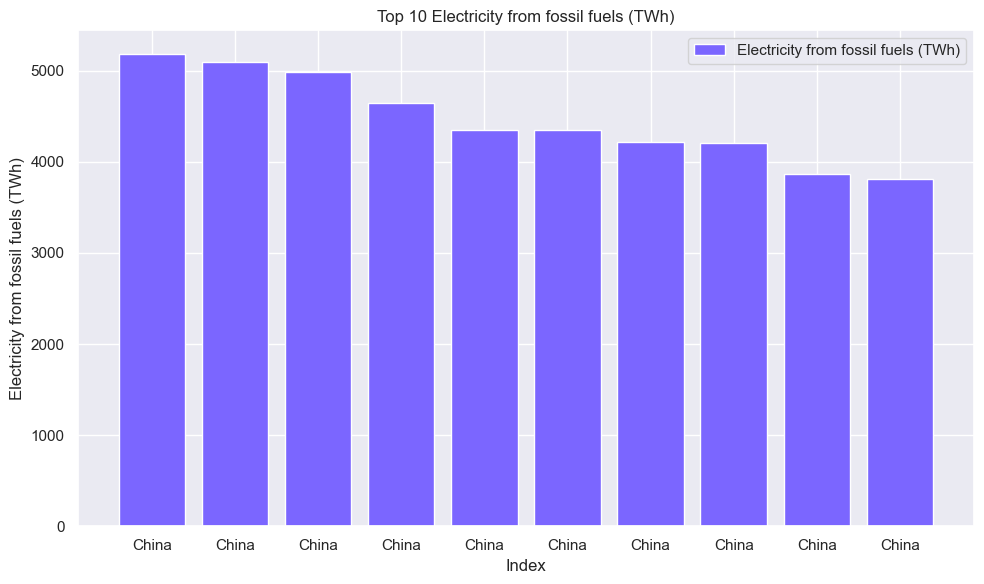

In [31]:
# Selecting the top 10 Electricity from fossil fuels (TWh) from the 'Electricity from fossil fuels (TWh)' column in the DataFrame 'df'
top_CO2 = df1['Electricity from fossil fuels (TWh)'].nlargest(10)
locations = df1.loc[top_CO2.index]['Entity']

# Plotting the top 10 prices using Matplotlib
plt.figure(figsize=(10, 6))  
plt.bar(range(len(top_CO2)), top_CO2, color='#7B66FF')  
plt.xlabel('Index')  
plt.ylabel('Electricity from fossil fuels (TWh)') 
plt.legend(['Electricity from fossil fuels (TWh)'])
plt.title('Top 10 Electricity from fossil fuels (TWh)') 
plt.xticks(range(len(top_CO2)), locations)  
plt.tight_layout()  
plt.show()

In [32]:
# Calculate the Max 'Entity' for each 'Electricity from renewables (TWh)'
Entity_By_Electricity = df1.groupby('Entity')['Electricity from renewables (TWh)'].max().reset_index()

# Create a line plot using Plotly Express
fig_Entity_By_Electricity = px.line(
    Entity_By_Electricity,  # DataFrame containing the data
    x='Entity',   # x-values: Year
    y='Electricity from renewables (TWh)',  # y-values: median Land
    labels={'Entity': 'Entity'},  # Customize label for the x-axis
    title='Electricity from renewables (TWh)',  # Set the title of the plot
    height=650  # Set the height of the plot
)

# Display the plot
fig_Entity_By_Electricity.show()

In [33]:
# Creating a DataFrame using the country names and cleaned land area values
energy_land_data_use_df = pd.DataFrame({'Country': countries, 'Land': land_int})

# Creating a bar plot using Plotly Express
fig = px.bar(energy_land_data_use_df, x='Country', y='Land', labels={'Land': 'Land Area - km2', 'Entity': 'Country'})

# Updating the graph layout and title
fig.update_layout(title={'text': 'Countries Land Area - in km2', 'x': 0.5})

# Displaying the graph
fig.show()

In [34]:
# Calculate the maximum 'Land' for each 'Country' category and sort in descending order
max_co2 = df1.groupby('Entity')['Land'].max().reset_index()
max_co2 = max_co2.sort_values(by='Land', ascending=False)

# Select the top 10 'Country' categories with the highest maximum 'Land' 
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='Entity',  # x-values: 'Country' categories
    y='Land',  # y-values: maximum 'Land' 
    color='Land',  # Color the bars based on the indices
    title='Top 10 Countries by Land ',  # Set the title of the plot
    labels={'Country': 'Country', 'Land': 'Land'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [35]:
energy_co2_data = df1[['Entity', 'Year', 'CO2']]#create new data 
energy_co2_data.head()

,Entity,Year,CO2
0,Afghanistan,2000,760.000000
1,Afghanistan,2001,730.000000
2,Afghanistan,2002,1029.999971
3,Afghanistan,2003,1220.000029
4,Afghanistan,2004,1029.999971


In [36]:
# Canada DataFrame with dropped missing values
energy_co2_data_canada = energy_co2_data[(energy_co2_data['Entity'] == 'Canada')]

# United States DataFrame with dropped missing values
energy_co2_data_united_states = energy_co2_data[(energy_co2_data['Entity'] == 'United States')]

# China DataFrame with dropped missing values
energy_co2_data_china = energy_co2_data[(energy_co2_data['Entity'] == 'China')]

# Brazil DataFrame with dropped missing values
energy_co2_data_Brazil = energy_co2_data[(energy_co2_data['Entity'] == 'Brazil')]

# Australia DataFrame with dropped missing values
energy_co2_data_Australia = energy_co2_data[(energy_co2_data['Entity'] == 'Australia')]
# India DataFrame with dropped missing values
energy_co2_data_India = energy_co2_data[(energy_co2_data['Entity'] == 'India')]
# Create subplots for

In [37]:
from plotly.subplots import make_subplots

In [38]:
# Create subplots for each country's CO2 emissions
fig = make_subplots(rows=6, cols=1, subplot_titles=('India','Canada', 'United States', 'China','Brazil','Australia'))

# Add traces for Canada, United States, and China CO2 emissions to separate subplots
fig.add_trace(go.Bar(x=energy_co2_data_India['Year'], y=energy_co2_data_India['CO2']), row=1, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_canada['Year'], y=energy_co2_data_canada['CO2']), row=2, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_united_states['Year'], y=energy_co2_data_united_states['CO2']), row=3, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_china['Year'], y=energy_co2_data_china['CO2']), row=4, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_Brazil['Year'], y=energy_co2_data_Brazil['CO2']), row=5, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_Australia['Year'], y=energy_co2_data_Australia['CO2']), row=6, col=1)

# Update subplot layout
fig.update_layout(height=1200, width=1200, showlegend=False, 
                  title='CO2 emission - in kiloton - by the Five biggest countries in the world, per year')

# Show subplot
fig.show()

In [39]:
#Gets all the years of 2019
energy_co2_data_2019 = energy_co2_data[(energy_co2_data['Year'] == 2019)]
# Drops the missing values
energy_co2_data_2019 = energy_co2_data_2019.dropna()
# Shows it columns
energy_co2_data_2019.columns

Index(['Entity', 'Year', 'CO2'], dtype='object')

In [40]:
# Creates the graph of 2019 CO2 emissions
fig_co2_2019 = px.bar(energy_co2_data_2019, x='Entity', y='CO2')
# Updates graph layout
fig_co2_2019.update_layout(title={'text': 'CO2 emission - in kiloton - by all the countries in the world, per year', 'x': 0.5})
# Shows graph
fig_co2_2019.show()


In [41]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df1[df1['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df1[column_name].min(),
            zmax=df1[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=False,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [42]:
select_col=df.columns
select_col = ['CO2','Electricity from fossil fuels (TWh)',
 'Electricity from renewables (TWh)','Electricity from nuclear (TWh)']

In [43]:
for i in select_col:
    column_name = i
    print(column_name)
    plot_world_map(column_name)

CO2


Electricity from fossil fuels (TWh)


Electricity from renewables (TWh)


Electricity from nuclear (TWh)


## Predicting Global Energy Consumption Trends

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [25]:
target = df1['Primary energy consumption per capita (kWh/person)']

In [26]:
df1.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,gdp_growth,gdp_per_capita,Density,Land
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0


In [27]:
df1.rename(columns={"gdp_per_capita": "GDP per capita"}, inplace=True)

In [28]:
features = df1[[
    'Access to electricity (% of population)',
    'GDP per capita',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)']]

In [29]:
features

,Access to electricity (% of population),GDP per capita,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,1.613591,13283.774348,0.16,0.0,0.31
1,4.074574,13283.774348,0.09,0.0,0.50
2,9.409158,179.426579,0.13,0.0,0.56
3,14.738506,190.683814,0.31,0.0,0.63
4,20.064968,211.382074,0.33,0.0,0.56
...,...,...,...,...,...
3644,42.561730,1464.588957,3.50,0.0,3.32
3645,44.178635,1235.189032,3.05,0.0,4.30
3646,45.572647,1254.642265,3.73,0.0,5.46
3647,46.781475,1316.740657,3.66,0.0,4.58


In [30]:
x = df1.drop(columns=['Entity', 'Primary energy consumption per capita (kWh/person)'])
y = target

In [31]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

### Splitting data into training and testing sets

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size = 0.4, random_state = 42)



df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

df_y_train.to_csv('mycsvTarget.csv',index=False)
df_y_test.to_csv('mycsvTargetTest.csv',index=False)

### Feature Scaling

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

# df_x_train = pd.DataFrame(x_train_scaled)
# df_x_train.to_csv('mycsvFeature.csv',index=False)

# df_x_test = pd.DataFrame(x_test_scaled)
# df_x_test.to_csv('mycsvFeatureTest.csv',index=False)

array([[ 0.66642904,  0.68820989,  0.89441485, ..., -0.48800072,
        -0.16452206, -0.38821715],
       [ 0.16445561,  0.67253258,  0.77052261, ..., -0.19814148,
        -0.17015282, -0.37415551],
       [-0.33751781,  0.69772811,  0.90891288, ..., -0.35582186,
        -0.24476028, -0.27111452],
       ...,
       [ 1.67037589,  0.69772811,  0.95767897, ...,  0.81334768,
        -0.12651449, -0.40170927],
       [ 0.83375351,  0.69772811,  0.57150421, ..., -0.55611841,
        -0.19971426, -0.11322806],
       [ 1.33572694,  0.69772811,  0.95767897, ...,  2.30925486,
        -0.27572942, -0.11132197]])

### Model Training 
Performing **Grid Search** for hyperparameters and Training the models

#### Random Forest

In [34]:
rf_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(x_train_scaled, y_train)
best_rf_params = rf_grid_search.best_params_

#### Gradient Boosting

In [35]:
gb_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(x_train_scaled, y_train)
best_gb_params = gb_grid_search.best_params_

#### Initializing models

In [36]:
random_forest_model = RandomForestRegressor(**best_rf_params, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(**best_gb_params, random_state=42)
linear_regression_model = LinearRegression()

#### Training

In [37]:
random_forest_model.fit(x_train_scaled, y_train)
gradient_boosting_model.fit(x_train_scaled, y_train)
linear_regression_model.fit(x_train_scaled, y_train)

LinearRegression()

### Predictions and Evaluation

#### Predictions

In [38]:
rforest_predictions = random_forest_model.predict(x_test_scaled)
linreg_predictions = linear_regression_model.predict(x_test_scaled)
gradboost_predictions = gradient_boosting_model.predict(x_test_scaled)

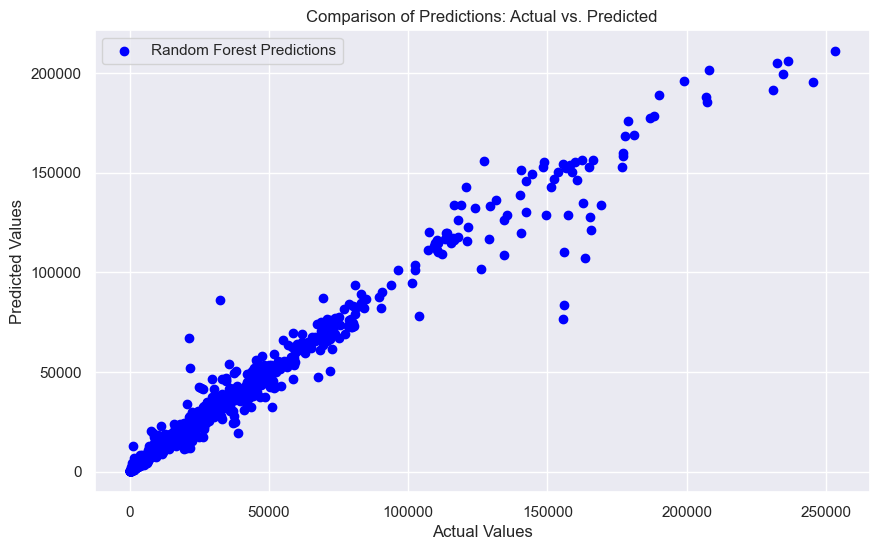

In [55]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Random Forest model
plt.scatter(y_test, rforest_predictions, color='blue', label='Random Forest Predictions')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

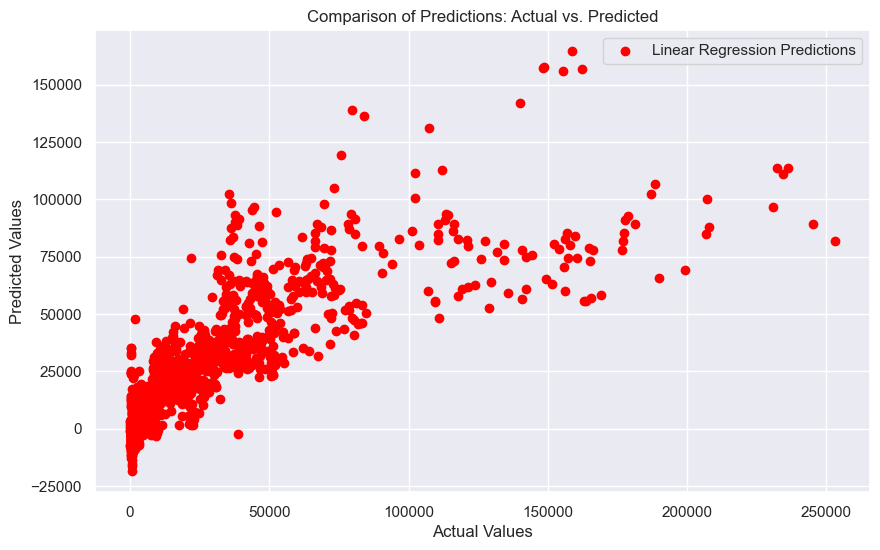

In [57]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Linear Regression model
plt.scatter(y_test, linreg_predictions, color='red', label='Linear Regression Predictions')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

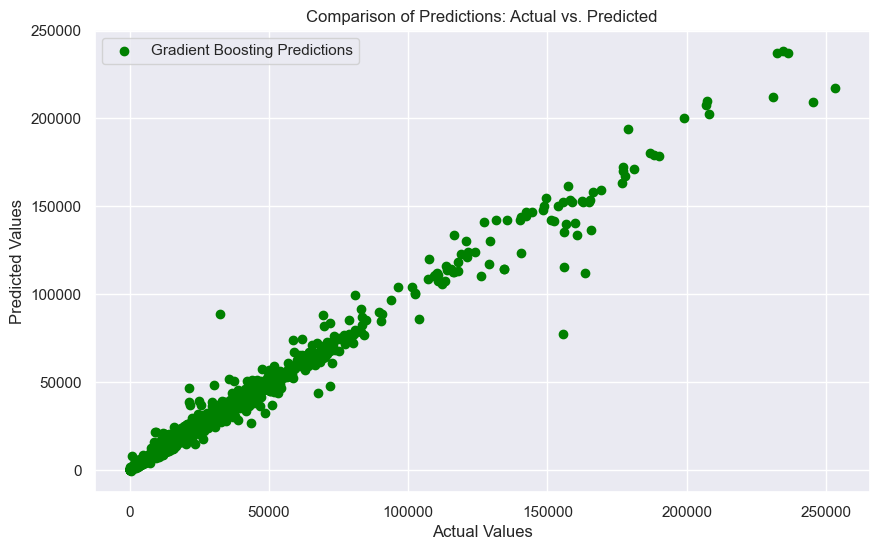

In [58]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Gradient Boosting model
plt.scatter(y_test, gradboost_predictions, color='green', label='Gradient Boosting Predictions')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

#### Evaluation

Mean Sqaured Error

In [40]:
rf_mse = mean_squared_error(y_test, rforest_predictions)
lr_mse = mean_squared_error(y_test, linreg_predictions)
gb_mse = mean_squared_error(y_test, gradboost_predictions)


R squared - coefficient of determination

In [41]:
rf_r2 = r2_score(y_test, rforest_predictions)
lr_r2 = r2_score(y_test, linreg_predictions)
gb_r2 = r2_score(y_test, gradboost_predictions)

#### Results

In [42]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'MSE': [rf_mse, lr_mse, gb_mse],
    'R-squared': [rf_r2, lr_r2, gb_r2]
})

In [43]:
results

,Model,MSE,R-squared
0,Random Forest,4.178842e+07,0.970284
1,Linear Regression,4.993009e+08,0.644939
2,Gradient Boosting,2.545016e+07,0.981902


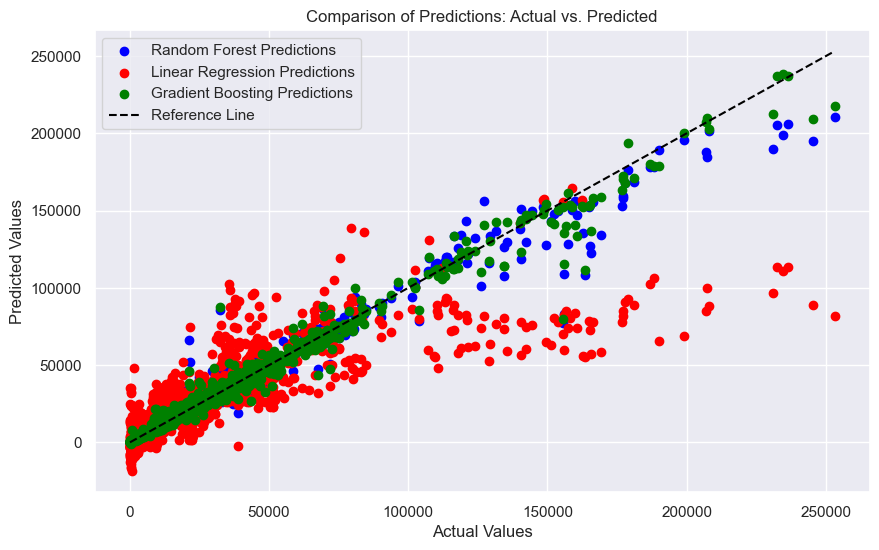

In [63]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Random Forest model
plt.scatter(y_test, rforest_predictions, color='blue', label='Random Forest Predictions')

# Scatter plot of actual vs. predicted values for Linear Regression model
plt.scatter(y_test, linreg_predictions, color='red', label='Linear Regression Predictions')

# Scatter plot of actual vs. predicted values for Gradient Boosting model
plt.scatter(y_test, gradboost_predictions, color='green', label='Gradient Boosting Predictions')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Reference Line')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

### XG Boost

In [44]:
train = xgb.DMatrix(x_train, label=y_train)
test = xgb.DMatrix(x_test, label=y_test)
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'reg:squarederror'
}
epochs = 100
XGB_model=xgb.train(params,train,epochs)
XGB_prediction=XGB_model.predict(test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, XGB_prediction)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 4109.732675162832


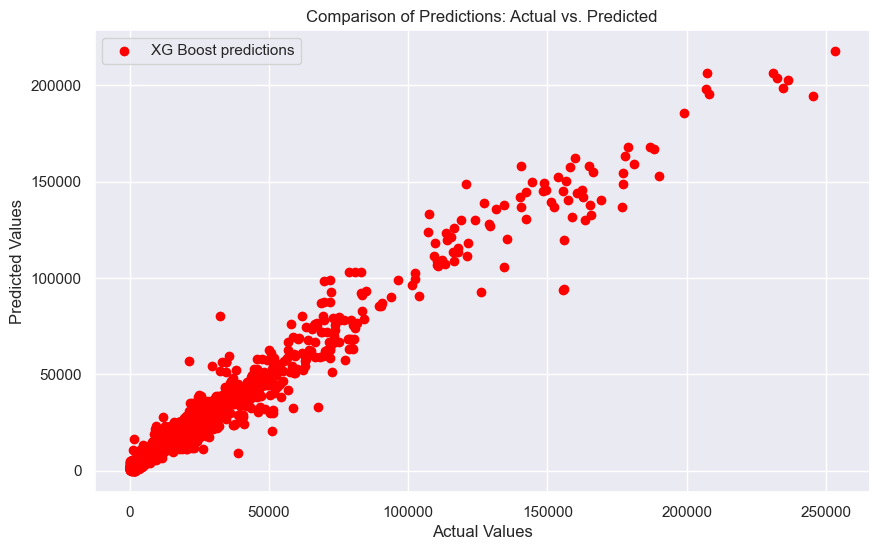

In [51]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Random Forest model
plt.scatter(y_test, XGB_prediction, color='red', label='XG Boost predictions')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

### Ada Boost

In [45]:
# Define the parameter grid for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 1.0],
}

# Initialize AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)

# Perform Grid Search with Cross Validation
ada_grid_search = GridSearchCV(estimator=ada_model,
                               param_grid=ada_param_grid,
                               scoring='neg_mean_squared_error',
                               cv=5)

# Fit the Grid Search to training data
ada_grid_search.fit(x_train_scaled, y_train)

# Extract the best parameters found
best_ada_params = ada_grid_search.best_params_

# Initialize AdaBoost Regressor with the best parameters
best_ada_model = AdaBoostRegressor(**best_ada_params, random_state=42)

# Fit the model to training data
best_ada_model.fit(x_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200, random_state=42)

In [46]:
# Initialize AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)

# Fit the model to the training data
ada_model.fit(x_train, y_train)

# Make predictions on the testing data
ada_prediction = ada_model.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_ada = mean_absolute_error(y_test, ada_prediction)
print("Mean Absolute Error (MAE) for AdaBoost:", mae_ada)


Mean Absolute Error (MAE) for AdaBoost: 16014.125378596615


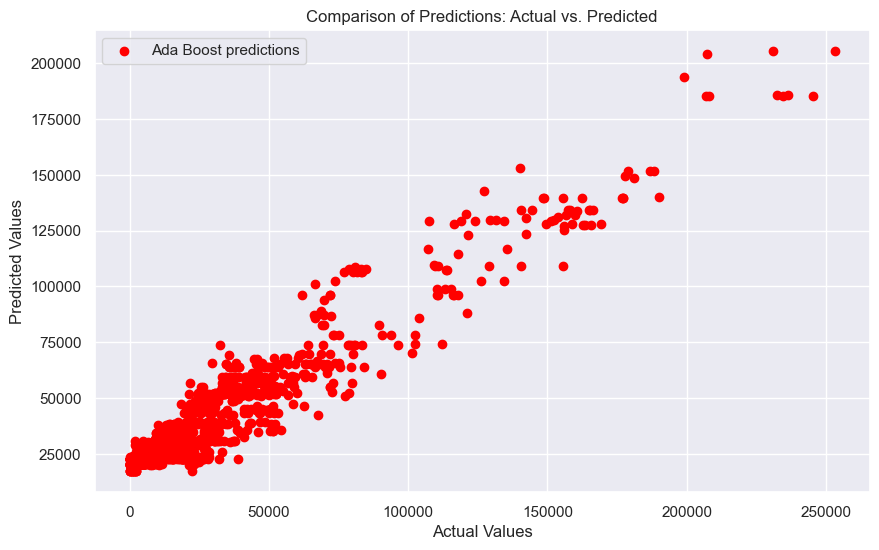

In [53]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values for Random Forest model
plt.scatter(y_test, ada_prediction, color='red', label='Ada Boost predictions')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

In [49]:
mse_xgboost = mean_squared_error(y_test, XGB_prediction)
r2_xgboost = r2_score(y_test, XGB_prediction)
mse_adaboost = mean_squared_error(y_test, ada_prediction)
r2_adaboost = r2_score(y_test, ada_prediction)

print(f'AdaBoost MSE: {mse_adaboost}')
print(f'AdaBoost R-squared: {r2_adaboost}')

print(f'XGBoost MSE: {mse_xgboost}')
print(f'XGBoost R-squared: {r2_xgboost}')

AdaBoost MSE: 311482669.0259931
AdaBoost R-squared: 0.7784998390858787
XGBoost MSE: 53959775.23108773
XGBoost R-squared: 0.9616283662460259


In [50]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting', 'XG Boost', 'Ada Boost'],
    'MSE': [rf_mse, lr_mse, gb_mse, mse_xgboost, mse_adaboost],
    'R-squared': [rf_r2, lr_r2, gb_r2, r2_xgboost, r2_adaboost]
})
results

,Model,MSE,R-squared
0,Random Forest,4.178842e+07,0.970284
1,Linear Regression,4.993009e+08,0.644939
2,Gradient Boosting,2.545016e+07,0.981902
3,XG Boost,5.395978e+07,0.961628
4,Ada Boost,3.114827e+08,0.778500


In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Initialize and fit Random Forest
random_forest_model = RandomForestRegressor(**best_rf_params, random_state=42)
random_forest_model.fit(x_train_scaled, y_train)
rforest_predictions = random_forest_model.predict(x_test_scaled)

# Initialize and fit Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(**best_gb_params, random_state=42)
gradient_boosting_model.fit(x_train_scaled, y_train)
gradboost_predictions = gradient_boosting_model.predict(x_test_scaled)

# Initialize and fit Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_scaled, y_train)
linreg_predictions = linear_regression_model.predict(x_test_scaled)

# Initialize and fit XGBoost
train = xgb.DMatrix(x_train, label=y_train)
test = xgb.DMatrix(x_test, label=y_test)
xgb_params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}
xgb_epochs = 100
XGB_model = xgb.train(xgb_params, train, xgb_epochs)
xgb_predictions = XGB_model.predict(test)

# Initialize and fit AdaBoost
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(x_train_scaled, y_train)
ada_predictions = ada_model.predict(x_test_scaled)



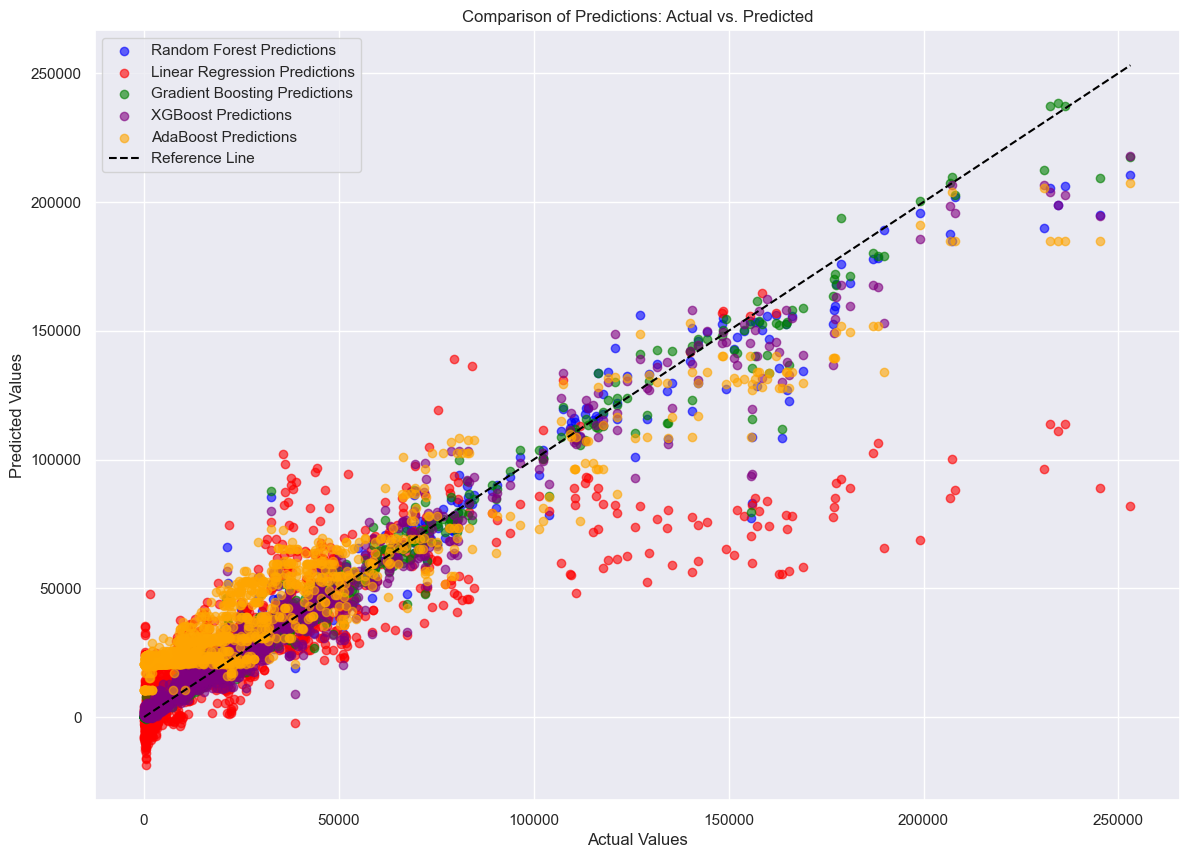

In [73]:
plt.figure(figsize=(14, 10))

# Scatter plot of actual vs. predicted values for Random Forest model
plt.scatter(y_test, rforest_predictions, color='blue', label='Random Forest Predictions', alpha=0.6)

# Scatter plot of actual vs. predicted values for Linear Regression model
plt.scatter(y_test, linreg_predictions, color='red', label='Linear Regression Predictions', alpha=0.6)

# Scatter plot of actual vs. predicted values for Gradient Boosting model
plt.scatter(y_test, gradboost_predictions, color='green', label='Gradient Boosting Predictions', alpha=0.6)

# Scatter plot of actual vs. predicted values for XGBoost model
plt.scatter(y_test, xgb_predictions, color='purple', label='XGBoost Predictions', alpha=0.6)

# Scatter plot of actual vs. predicted values for AdaBoost model
plt.scatter(y_test, ada_predictions, color='orange', label='AdaBoost Predictions', alpha=0.6)

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Reference Line')

# Adding labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions: Actual vs. Predicted')
plt.legend()

# Displaying the plot
plt.show()

